# Clustering 
__From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.__

# Importing libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [59]:
df=pd.read_csv('Iris.csv')

In [60]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


__We have four type of Species.__

In [61]:
q=df.Species.unique()
print(f'''Type of Species  
1- {q[0]}
2- {q[1]}
3- {q[2]}
        ''')

Type of Species  
1- Iris-setosa
2- Iris-versicolor
3- Iris-virginica
        


In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species_Encode']=le.fit_transform(df['Species'])

In [63]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_Encode'],
      dtype='object')

In [64]:
# Using only 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' feature for our model.
X=df.iloc[:,1:5].values

# PCA


In [65]:
# Normalizing the numerical data 
# It is important to do because it helps to create more better model and brings all the data into one Scale.
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
iris_stand=ss.fit_transform(X)

In [66]:
iris_stand=pd.DataFrame(iris_stand,columns=df.iloc[:,1:5].columns)
iris_stand.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  
pca_values = pca.fit_transform(iris_stand)


In [68]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523])

In [69]:
# As we can See that Only pc1 and pc2 are containing the 95% of the information
explained_variance.sum()

0.9580097536148199

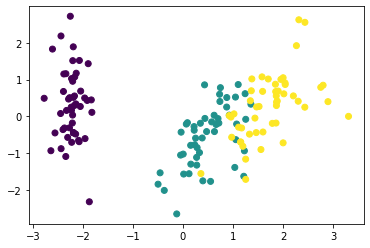

In [70]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
plt.scatter(x,y,c=df.Species_Encode)

In [71]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2',]), df[['Species_Encode']]], axis = 1)
finalDf.head()

,pc1,pc2,Species_Encode
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


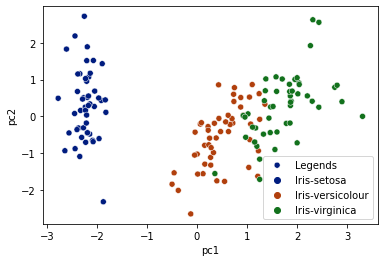

In [72]:
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Species_Encode',palette='dark')
plt.legend(['Legends','Iris-setosa','Iris-versicolour','Iris-virginica'])

# Using K means Clustering

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

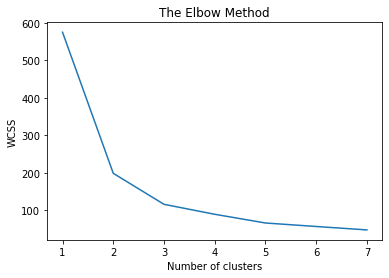

In [74]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
#Taking 3 as the number of cluster as we the sudden change in Wcss value
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_values)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

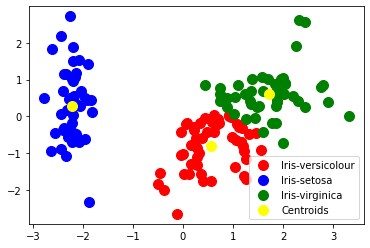

In [76]:
# Visualising the clusters - On the first two columns
plt.scatter(pca_values[y_kmeans == 0, 0], pca_values[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(pca_values[y_kmeans == 1, 0], pca_values[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(pca_values[y_kmeans == 2, 0], pca_values[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [77]:
df['K_means_pred']=y_kmeans

In [78]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encode,K_means_pred
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2,0


In [79]:
df.Species_Encode.value_counts()

2    50
1    50
0    50
Name: Species_Encode, dtype: int64

In [80]:
df.K_means_pred.value_counts()

0    53
1    50
2    47
Name: K_means_pred, dtype: int64

__On finding the cluster we can come to a conclusion that there is mis-match of 6 values in K-means predicted values.__